In [1]:
from bs4 import BeautifulSoup
import urllib.request as REQ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False
warnings.simplefilter('ignore')

In [37]:
df1 = pd.read_csv('2014년 졸음운전 교통사고.csv', engine='python', sep='[,년]')
df2 = pd.read_csv('2015년 졸음운전 교통사고.csv', engine='python', sep='[,년]')
df3 = pd.read_csv('2016년 졸음운전 교통사고.csv', engine='python', sep='[,년]')
df = pd.concat([df1,df2,df3])
df=df.reset_index()
df.rename(columns={'index':'년도','구분':'월'},inplace=True)
df=df.pivot_table(index=['년도','월'])
df

부상(명)  사고(건)  사망(명)
년도   월                       
2014 10월    392    210     14
     11월    386    209     10
     12월    329    178     12
     1월     347    169      7
     2월     268    145      3
     3월     358    206     12
     4월     360    182      4
     5월     474    218     17
     6월     457    233     13
     7월     431    229     14
     8월     447    222      9
     9월     430    225     15
2015 10월    475    214     14
     11월    398    199      3
     12월    428    213      8
     1월     375    205      8
     2월     375    175      8
     3월     492    237      4
     4월     486    227     10
     5월     504    231      9
     6월     401    207      8
     7월     556    273      7
     8월     534    268     19
     9월     501    252     10
2016 10월    367    183     10
     11월    418    200      5
     12월    364    168      4
     1월     387    192      5
     2월     328    174      6
     3월     435    217      7
     4월     419    216      7
     5월     522    239     13
     6월     362    200     12
     7월     460    227      9
     8월     490    230      7
     9월     347    187     13

In [40]:
ex1 = df.loc[2016]
ex1['사망율'] = ex1['사망(명)']/ex1['사고(건)']
ex1

부상(명)  사고(건)  사망(명)       사망율
월                                 
10월    367    183     10  0.054645
11월    418    200      5  0.025000
12월    364    168      4  0.023810
1월     387    192      5  0.026042
2월     328    174      6  0.034483
3월     435    217      7  0.032258
4월     419    216      7  0.032407
5월     522    239     13  0.054393
6월     362    200     12  0.060000
7월     460    227      9  0.039648
8월     490    230      7  0.030435
9월     347    187     13  0.069519

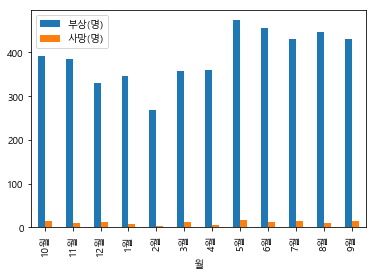

In [45]:
ex2 = df.loc[2014]
ex2.drop(columns=['사고(건)'],inplace=True)
ex2.plot(kind='bar')
plt.show()

In [54]:
ex3 = df.loc[2016]
ex3['증가율'] = df.loc[2016]['사망(명)']/df.loc[2015]['사망(명)']
ex3[ex3['증가율']==ex3['증가율'].max()]

부상(명)  사고(건)  사망(명)   증가율
월                            
3월    435    217      7  1.75